In [1]:
from PIL import Image, ImageDraw
from torch.utils.data import DataLoader

import numpy as np
from src.voc_dataset import *

In [39]:
dataset = VOCDataSet("data/", "train", include_gt_lable=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=5, collate_fn=collate_fn)

In [40]:
iterator = iter(dataloader)


  2
 18
 15
 15
 15
[torch.FloatTensor of size 5]



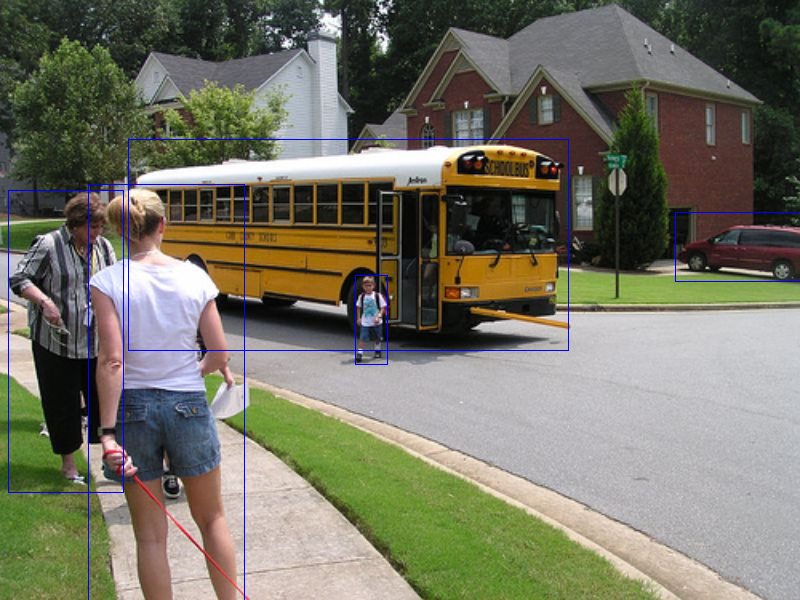

In [48]:
image_arr, gt, labels = iterator.next()

image_arr = image_arr.squeeze().numpy()
image_arr = image_arr * PIXEL_STDS
image_arr = image_arr + PIXEL_MEANS
image_arr = image_arr * 255.0
image_arr = image_arr.transpose(1, 2, 0).round().astype(np.uint8)

image = Image.fromarray(image_arr)
image_draw = ImageDraw.ImageDraw(image)

gt = gt.numpy()
for i in range(gt.shape[0]):
    image_draw.rectangle(gt[i, :], outline="blue")

print(labels)
image